In [1]:
#Exemple

In [2]:
import numpy as np



In [3]:
 import  matplotlib.pyplot  as  plt 

In [4]:
plt.style.use('ggplot')

In [5]:
from sklearn.decomposition import PCA

In [6]:

pip install gensim --user

Note: you may need to restart the kernel to use updated packages.


In [7]:
from gensim.test.utils import datapath, get_tmpfile

In [8]:
from gensim.models import KeyedVectors

In [9]:
from gensim.scripts.glove2word2vec import glove2word2vec


In [10]:
glove_file = datapath('/home/dabone/Documents/nlp/docs/glove.6B/glove.6B.100d.txt')

In [11]:
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")

In [12]:
glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [13]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [23]:
model.most_similar('alassane')

[('ouattara', 0.8170632123947144),
 ('dramane', 0.7064899206161499),
 ('natchaba', 0.63048255443573),
 ('temaru', 0.5611753463745117),
 ('yanukovich', 0.5429418087005615),
 ('outtara', 0.5387839078903198),
 ('ravalomanana', 0.5351717472076416),
 ('bedie', 0.5339654684066772),
 ('ranil', 0.5319847464561462),
 ('papadopoulos', 0.5193901062011719)]

In [82]:
model.most_similar('alassane')

[('ouattara', 0.8170632123947144),
 ('dramane', 0.7064899206161499),
 ('natchaba', 0.63048255443573),
 ('temaru', 0.5611753463745117),
 ('yanukovich', 0.5429418087005615),
 ('outtara', 0.5387839078903198),
 ('ravalomanana', 0.5351717472076416),
 ('bedie', 0.5339654684066772),
 ('ranil', 0.5319847464561462),
 ('papadopoulos', 0.5193901062011719)]

In [25]:
model.most_similar(negative='bon')

[('http://www.opel.com', 0.5681654214859009),
 ('bacteriologists', 0.5426684617996216),
 ('arubans', 0.5400708913803101),
 ('rw95', 0.5396685600280762),
 ('jamadagni', 0.5391298532485962),
 ('guayasamin', 0.534720778465271),
 ('jailors', 0.5285975933074951),
 ('25aou94', 0.5281779766082764),
 ('unaggressive', 0.526123046875),
 ('biotechnologists', 0.5241908431053162)]

In [86]:
model.most_similar('homme')

[('jeune', 0.5907549858093262),
 ('ocelot', 0.5334548950195312),
 ('bon', 0.5312290191650391),
 ('bonhomme', 0.5225324630737305),
 ('oliveri', 0.5087834000587463),
 ('une', 0.5038093328475952),
 ("d'un", 0.4918454587459564),
 ('dans', 0.47858887910842896),
 ('preud', 0.47792521119117737),
 ('sambora', 0.4730150103569031)]

In [26]:
result = model.most_similar(positive=['femme', 'homme'], negative=['homme'])
print("{}: {:.4f}".format(*result[0]))


fatale: 0.8272


In [28]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [32]:
analogy('japan', 'japanese', 'australia')

'australian'

In [33]:
analogy('good', 'fantastic', 'bad')


'terrible'

In [34]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/home/dabone/.local/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [37]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)


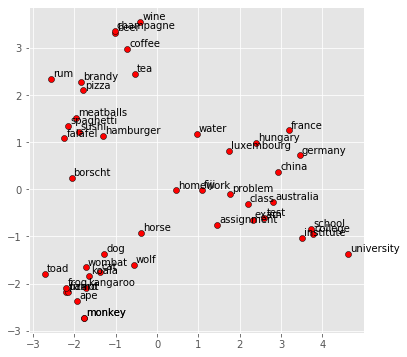

In [38]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

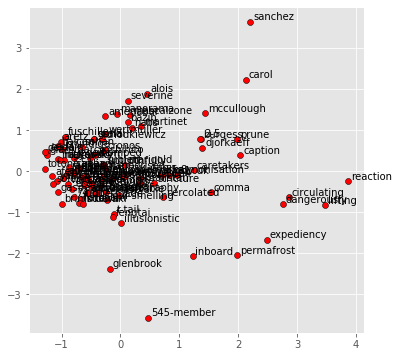

In [101]:
display_pca_scatterplot(model, sample=100)

In [2]:
#Devoir 1


In [1]:
# All Import Statements Defined Here
# Note: Do not add to this list.
# ----------------

import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5

from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)

[nltk_data] Downloading package reuters to /home/dabone/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [2]:
def read_corpus(category="crude"):
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    files = reuters.fileids(category)
    return [[START_TOKEN] + [w.lower() for w in list(reuters.words(f))] + [END_TOKEN] for f in files]

In [3]:
reuters_corpus = read_corpus()
pprint.pprint(reuters_corpus[:3], compact=True, width=100)

[['<START>', 'japan', 'to', 'revise', 'long', '-', 'term', 'energy', 'demand', 'downwards', 'the',
  'ministry', 'of', 'international', 'trade', 'and', 'industry', '(', 'miti', ')', 'will', 'revise',
  'its', 'long', '-', 'term', 'energy', 'supply', '/', 'demand', 'outlook', 'by', 'august', 'to',
  'meet', 'a', 'forecast', 'downtrend', 'in', 'japanese', 'energy', 'demand', ',', 'ministry',
  'officials', 'said', '.', 'miti', 'is', 'expected', 'to', 'lower', 'the', 'projection', 'for',
  'primary', 'energy', 'supplies', 'in', 'the', 'year', '2000', 'to', '550', 'mln', 'kilolitres',
  '(', 'kl', ')', 'from', '600', 'mln', ',', 'they', 'said', '.', 'the', 'decision', 'follows',
  'the', 'emergence', 'of', 'structural', 'changes', 'in', 'japanese', 'industry', 'following',
  'the', 'rise', 'in', 'the', 'value', 'of', 'the', 'yen', 'and', 'a', 'decline', 'in', 'domestic',
  'electric', 'power', 'demand', '.', 'miti', 'is', 'planning', 'to', 'work', 'out', 'a', 'revised',
  'energy', 'supply

  ',', 'economy', 'and', 'other', 'rights', 'of', 'both', 'countries', '.', '"', 'as', 'the',
  'issue', 'is', 'basicly', 'political', ',', 'a', 'solution', 'can', 'only', 'be', 'found', 'by',
  'bilateral', 'negotiations', ',"', 'the', 'statement', 'said', '.', 'greece', 'has', 'repeatedly',
  'said', 'the', 'issue', 'was', 'legal', 'and', 'could', 'be', 'solved', 'at', 'the',
  'international', 'court', 'of', 'justice', '.', 'the', 'two', 'countries', 'approached', 'armed',
  'confrontation', 'last', 'month', 'after', 'greece', 'announced', 'it', 'planned', 'oil',
  'exploration', 'work', 'in', 'the', 'aegean', 'and', 'turkey', 'said', 'it', 'would', 'also',
  'search', 'for', 'oil', '.', 'a', 'face', '-', 'off', 'was', 'averted', 'when', 'turkey',
  'confined', 'its', 'research', 'to', 'territorrial', 'waters', '.', '"', 'the', 'latest',
  'crises', 'created', 'an', 'historic', 'opportunity', 'to', 'solve', 'the', 'disputes', 'between',
  'the', 'two', 'countries', ',"', 'the', 'for

In [34]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): list of distinct words across the corpus, sorted (using python 'sorted' function)
            num_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
    num_corpus_words = -1
    
    # ------------------
    corpus_words = [i for (j,i) in enumerate(corpus_words) 
                    if j != len(corpus_words) 
                        if i != corpus_words[j+1]
                         ]
    
    #corpus_word = [word for i in range(len(corpus_word)) 
     #                     for word in corpus_word[i:]
     #                         if word not corpus_word[i] 

    # Write your implementation here.

    # ------------------

    return corpus_words, num_corpus_words

In [35]:
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

In [36]:
# Correct answers
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
ans_num_corpus_words = len(ans_test_corpus_words)



In [37]:
# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)



AssertionError: Incorrect number of distinct words. Correct: 10. Yours: -1

In [38]:
# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))



AssertionError: Incorrect corpus_words.
Correct: ['<END>', '<START>', 'All', "All's", 'ends', 'glitters', 'gold', "isn't", 'that', 'well']
Yours:   []

In [39]:
# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------
